# Vive les courses 



0. Importez les librairies usuelles

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


1. Télécharger le dataset customer.csv sur le drive

In [4]:
customers = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/00292/Wholesale%20customers%20data.csv")
customers.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [5]:
customers.shape

(440, 8)

2. Supprimez les variables qualitatives du dataset

In [6]:
customers.drop(["Channel", "Region"], axis = 1, inplace = True)
customers.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


4. Conservez maintenant uniquement les colonnes Grocery et Milk

In [7]:
customers_subset = customers[['Grocery', "Milk"]]

5. Visualisez ces données via un scatter plot

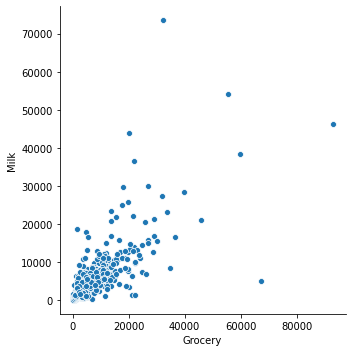

In [9]:
sns.relplot(x="Grocery", y="Milk", data=customers[['Grocery', "Milk"]]) # on voit clairement une liaison entre les deux

6. Normalisez les données

In [20]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(customers)
customers_scaled = scaler.transform(customers)

7. Définissez une instance de DBSCAN avec les paramètres eps = .5, 
min_samples = 15

In [31]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps = .3, min_samples = 8) #.fit(dataset)

8. Créez un objet dbscan_predict qui contient les classes définies par DBSCAN

In [37]:
customers_classes = dbscan.fit_predict(customers_scaled)
customers_classes

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1,  0, -1,
       -1, -1, -1, -1,  0, -1, -1, -1, -1,  0,  0, -1, -1, -1, -1, -1, -1,
        0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1,  0, -1, -1, -1,
       -1,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0, -1, -1,  1, -1,
       -1, -1, -1, -1, -1,  0, -1, -1, -1, -1, -1, -1,  0,  0, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  0,  0, -1, -1,
        0,  1,  0,  0, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,  0, -1,  0, -1,  1,
       -1,  0, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0,  0,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,
       -1, -1, -1, -1,  0,  0, -1,  0, -1, -1, -1, -1,  0, -1, -1, -1,  0,
       -1, -1,  0, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,  0,  0,
       -1, -1, -1,  0, -1

9. Visualisez les données en colorant les points en fonction de la classe trouvée par DBSCAN

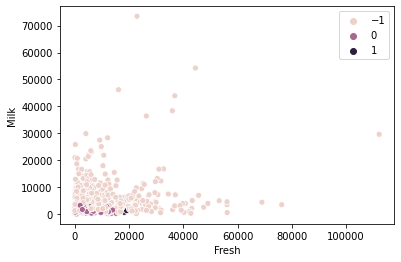

In [38]:
import seaborn as sns
sns.scatterplot(customers.iloc[:, 0], customers.iloc[:,1], hue = customers_classes)

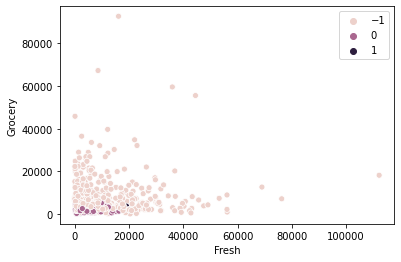

In [39]:
sns.scatterplot(customers.iloc[:, 0], customers.iloc[:,2], hue = customers_classes)